In [53]:
#Libraries reduired for this task
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [54]:
#importing and displaying data
df = pd.read_csv("E:\Python Practice\Prediction of House Sale\kc_house_data.csv\kc_house_data.csv")

In [105]:
#Module 1: Importing Data Sets

df.head()
print(df.dtypes)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [56]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [57]:
#Module 2: Data Wrangling

missing_data = df.isnull()

In [58]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()

id
False    21613
Name: id, dtype: int64

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21613
Name: bedrooms, dtype: int64

bathrooms
False    21613
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat
False    21613
Name: lat, dtype: int64

long
False    21613
Name: long, dtype: int64

sq

In [59]:
#data Warngling
df.drop(["id"], axis=1, inplace = True)

In [60]:
df.dropna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [61]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [62]:
#Module 3: Exploratory Data Analysis

df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [63]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

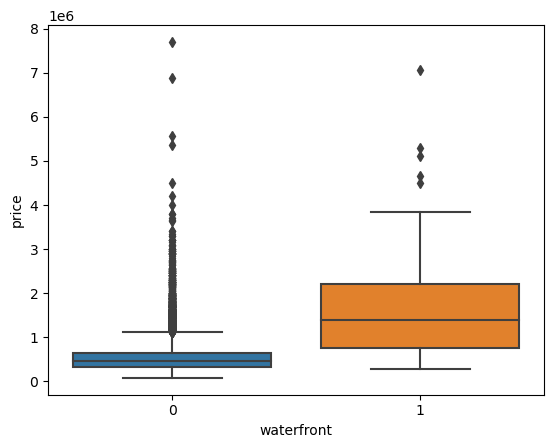

In [64]:
sns.boxplot(x="waterfront", y="price", data=df)

(0.0, 8081250.0)

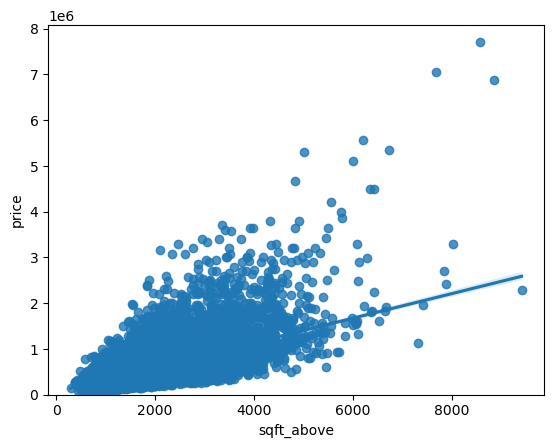

In [65]:
sns.regplot(data=df, x="sqft_above", y="price")
plt.ylim(0,)

In [66]:
#Module 4: Model Development

lm = LinearRegression()
lm

LinearRegression()

In [67]:
X = df[['sqft_living']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.4928532179037931

In [68]:
y_data = df["price"]
x_data = df.drop("price", axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state = 1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

lre = LinearRegression()

lre.fit(x_train[["sqft_living"]], y_train)
lre.score(x_test[["sqft_living"]], y_test)

number of test samples: 3242
number of training samples: 18371


0.4910058627910614

In [69]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [70]:
lm = LinearRegression()
lm

X = df[["floors"]]
Y = df["price"]

lm.fit(X, Y)
lm.score(X, Y)

0.06594310068341092

In [71]:
lm = LinearRegression()
lm

X = df[["waterfront"]]
Y = df["price"]

lm.fit(X, Y)
lm.score(X, Y)

0.07095267538578331

In [72]:
lm = LinearRegression()
lm

X = df[['lat']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.09425113672917462

In [73]:
lm = LinearRegression()
lm

X = df[['bedrooms']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.09507947467657651

In [74]:
lm = LinearRegression()
lm

X = df[['sqft_basement']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.104856815269744

In [75]:
lm = LinearRegression()
lm

X = df[['view']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.15784211584121532

In [76]:
lm = LinearRegression()
lm

X = df[['bathrooms']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.27576939959239877

In [77]:
lm = LinearRegression()
lm

X = df[['sqft_living15']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.3426684607560172

In [78]:
lm = LinearRegression()
lm

X = df[['sqft_above']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.3667117528382794

In [79]:
lm = LinearRegression()
lm

X = df[['grade']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.44546848610928713

In [80]:
lm = LinearRegression()
lm

X = df[['sqft_living']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

In [81]:
Input = [("scale", StandardScaler()), ("polynominal", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]

In [82]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynominal', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [83]:
pipe.fit(X, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynominal', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [84]:
pipe.score(X, Y)

0.5327430940591443

In [85]:
#Module 5: Model Evaluation and Refinement

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [86]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

X=df[features]
Y=df["price"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


In [87]:
from sklearn.linear_model import Ridge

In [88]:
pr = PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

In [89]:
RidgeModel = Ridge(alpha=0.1)

RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [90]:
RidgeModel.score(x_train_pr, y_train)

0.7418393310989109

In [91]:
import tqdm as tqdm
from tqdm import tqdm
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|▏                                              | 5/1000 [00:00<01:58,  8.39it/s, Test Score=0.7, Train Score=0.74]C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.29633e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  1%|▎                                              | 7/1000 [00:00<01:39,  9.96it/s, Test Score=0.7, Train Score=0.74]C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.68996e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  1%|▍                                           | 10/1000 [00:01<01:42,  9.69it/s, Test Score=0.699, Train Score=0.74]C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.84742e-17): result may not be accurate.
  return linalg

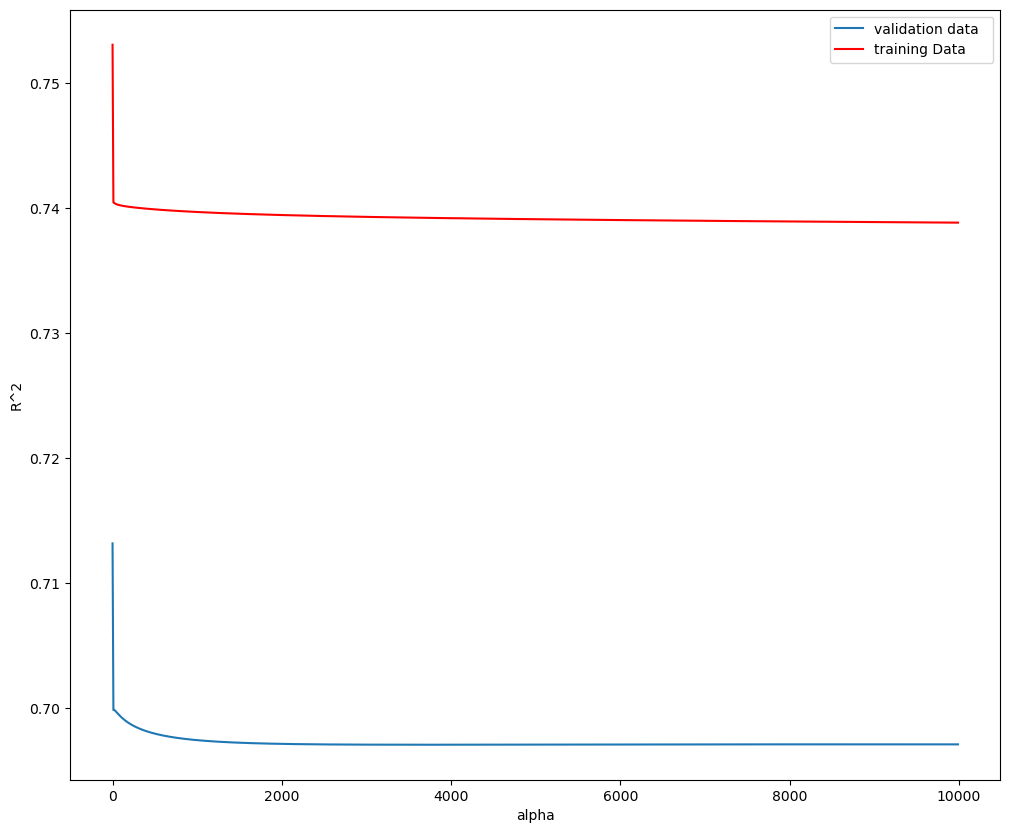

In [93]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [96]:
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

In [97]:
x_polly=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

In [98]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_train_pr, y_train)

0.7418393310989109

In [100]:
x_test_pr=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_polly=pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_test_pr, y_test)
RidgeModel.score(x_test_pr, y_test)

0.7655946473075745